In [32]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
#Minha base de dados sobre a Meta da taxa SELIC veio do site oficial do Banco Central
#Minha base de dados sobre o Fed Fund Rate veio do site oficial do Federal Reserve Bank of St.Louis

# Especifique o par de moedas (BRL/USD) que desejo analisar
currency_pair = 'USDBRL=X'  # Taxa de câmbio BRL para USD

# Defina o intervalo de datas para os dados
start_date = '2004-01-01'
end_date = '2023-09-27'

# peguei os dados de taxa de câmbio do Yahoo Finance, nomeando os dados como 'exchange_rate_data'
exchange_rate_data = yf.download(currency_pair, start=start_date, end=end_date)



#Traçando um gráfico interativo onde 'exchange_rate_data.index' será o eixo x, que neste caso a data, e a taxa de câmbio USD/BRL como eixo y.
fig = px.line(exchange_rate_data, x=exchange_rate_data.index, y='Adj Close',
              title='Value of Brazilian Real (BRL) Against USD Over Time',
              labels={'Adj Close': 'BRL/USD Exchange Rate'},
              template='plotly_dark')

# Customize hover tooltips
fig.update_traces(mode='lines+markers', hovertemplate='%{y:.2f} BRL/USD<br>%{x|%b %Y}')

# Mostre o grafico interativo
fig.show()
#Pedindo para mostrar o data set do 'exchange_rate_data'
exchange_rate_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,2.9010,2.9010,2.901000,2.9010,2.9010,0
2004-01-02,2.9010,2.9010,2.876000,2.8760,2.8760,0
2004-01-05,2.8760,2.8760,2.853000,2.8530,2.8530,0
2004-01-06,2.8530,2.8660,2.840000,2.8660,2.8660,0
2004-01-07,2.8660,2.8800,2.858000,2.8580,2.8580,0
...,...,...,...,...,...,...
2023-09-20,4.8658,4.8679,4.838740,4.8658,4.8658,0
2023-09-21,4.8788,4.9305,4.876032,4.8788,4.8788,0
2023-09-22,4.9349,4.9359,4.901715,4.9349,4.9349,0


In [33]:
#nomeando df1 como o novo dataframe do pandas usando os dados do 'exchang_rate_data' pré-estabelecido.
df1=pd.DataFrame(exchange_rate_data)
#Criando uma nova coluna chamada 'DateTime' (que usarei depois) na qual obtenho o índice do data set do data frame da moeda e o converto para o tipo datetime.
df1['DateTime']=pd.to_datetime(df1.index)
#Pedindo para mostrar o df1 novo com a coluna 'DateTime'
df1



,Open,High,Low,Close,Adj Close,Volume,DateTime
Date,,,,,,,
2004-01-01,2.9010,2.9010,2.901000,2.9010,2.9010,0,2004-01-01
2004-01-02,2.9010,2.9010,2.876000,2.8760,2.8760,0,2004-01-02
2004-01-05,2.8760,2.8760,2.853000,2.8530,2.8530,0,2004-01-05
2004-01-06,2.8530,2.8660,2.840000,2.8660,2.8660,0,2004-01-06
2004-01-07,2.8660,2.8800,2.858000,2.8580,2.8580,0,2004-01-07
...,...,...,...,...,...,...,...
2023-09-20,4.8658,4.8679,4.838740,4.8658,4.8658,0,2023-09-20
2023-09-21,4.8788,4.9305,4.876032,4.8788,4.8788,0,2023-09-21
2023-09-22,4.9349,4.9359,4.901715,4.9349,4.9349,0,2023-09-22


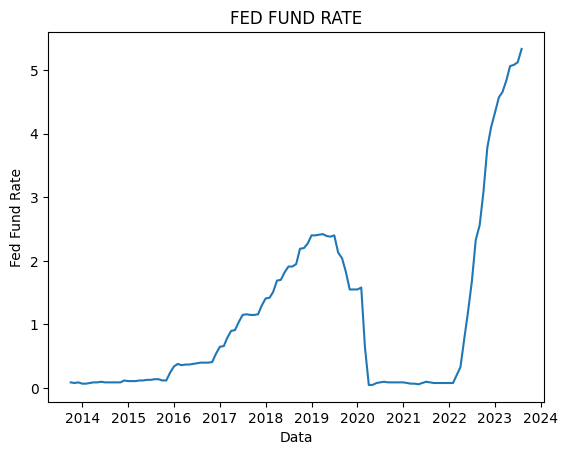

In [34]:
#Criando uma base de dados chamada 'df' na qual peço leia meu arquivo csv chamado 'FEDFUNDS', que é uma coleção dos valores da Fed Fund Rate 
df = pd.read_csv(r'C:\Users\linde\Downloads\FEDFUNDS.csv')
#Criando uma nova coluna entre esta base de dados chamada 'DateTime' na qual pego a coluna 'DATE' e converto os valores para o tipo Datetime.
df['DateTime'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')


# Defina a data após a qual desejo coletar dados, escolhi essa data porque meu data frame da Taxa SELIC só tem dados a partir desse dia.
certain_date = pd.to_datetime('2013-09-22')

# Filtrei o DataFrame para incluir apenas linhas com datas posteriores a data 2013-09-22
filtered_df = df[df['DateTime'] > certain_date]
#Definindo os nomes das linhas x y e o título do gráfico
plt.xlabel("Data")
plt.ylabel("Fed Fund Rate")
plt.title("FED FUND RATE")
#Mostrando o gráfico com a coluna 'DateTime' no eixo x e 'FEDFUNDS' no eixo y
plt.plot(filtered_df['DateTime'], filtered_df['FEDFUNDS'])



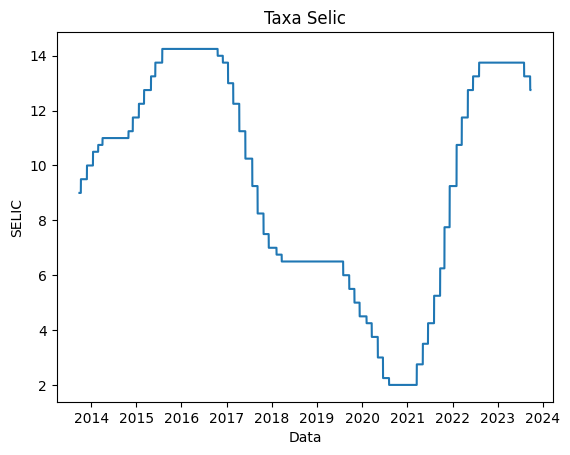

In [35]:

#Criando uma base de dados chamada 'selic' na qual peço leia meu arquivo csv, que é uma coleção dos valores da 'Meta da taxa Selic'
selic= pd.read_csv(r'C:\Users\linde\Downloads\chart.csv')
#Criando uma nova coluna entre esta base de dados chamada 'DateTime' na qual pego o 'DateTime' anterior e converto os valores para o tipo Datetime.
selic['DateTime'] = pd.to_datetime(selic['DateTime'], format='%Y-%m-%d')


# Defina a data após a qual desejo coletar dados
certain_date_selic = pd.to_datetime('2013-09-27')

# Filtre o DataFrame para incluir apenas linhas com datas posteriores a determinada data
filtered_df_selic = selic[selic['DateTime'] > certain_date_selic]
#Defnindo os nomes das linhas x y e o título do gráfico
plt.xlabel("Data")
plt.ylabel("SELIC")
plt.title("Taxa Selic")
#Mostrando o gráfico com a coluna 'DateTime' no eixo x e 'Meta para a taxa Selic' no eixo y
plt.plot(filtered_df_selic['DateTime'], filtered_df_selic['Meta para a taxa Selic'])



In [36]:
#Criando um novo conjunto de dados chamado 'juntos' no qual agrupo os taxa selic e a taxa do Fed Fund combinando-os de acordo com os dados disponíveis no conjunto de dados da taxa do Fed Fund('filtered_df'), isso ocorre porque os dados que coletei sobre a Taxa do Fed Fund só tem dados disponíveis para o primeiro dia de cada mês.
juntos=pd.merge(filtered_df,selic, on='DateTime', how='left')
#Fiz basicamente a mesma coisa que a linha acima, na qual agora estou apenas adicionando ao conjunto de dados 'juntos' os valores do USD/BRL ('df1'), para o 'Datetime' que corresponde aos valores definidos por o conjunto de dados juntos anterior.
juntos=pd.merge(juntos,df1, on='DateTime',how='left')
#Como faltavam alguns valores em algumas colunas, fiz com que fossem preenchidos com os mesmos valores da linha anterior, que neste caso seriam os valores correspondentes ao mês anterior.
juntos=juntos.fillna(method='ffill')
#Crie uma nova coluna chamada 'Diferencial' que seria o Diferencial de juros entre a Taxa Selic e a Taxa Fed Fund. esta nova coluna 'Diferencial' teria seu valor dado pela subtração do valor da 'Meta para a taxa Selic' e dos 'FEDFUNDS'
juntos['Diferencial']=juntos['Meta para a taxa Selic']-juntos['FEDFUNDS']

print(juntos)

           DATE  FEDFUNDS   DateTime  Meta para a taxa Selic    Open    High  \
0    2013-10-01      0.09 2013-10-01                    9.00  2.2170  2.2228   
1    2013-11-01      0.08 2013-11-01                    9.50  2.2319  2.2565   
2    2013-12-01      0.09 2013-12-01                   10.00  2.2319  2.2565   
3    2014-01-01      0.07 2014-01-01                   10.00  2.3571  2.3571   
4    2014-02-01      0.07 2014-02-01                   10.50  2.3571  2.3571   
..          ...       ...        ...                     ...     ...     ...   
114  2023-04-01      4.83 2023-04-01                   13.75  5.2359  5.2367   
115  2023-05-01      5.06 2023-05-01                   13.75  4.9860  4.9879   
116  2023-06-01      5.08 2023-06-01                   13.75  5.0548  5.0553   
117  2023-07-01      5.12 2023-07-01                   13.75  5.0548  5.0553   
118  2023-08-01      5.33 2023-08-01                   13.75  4.7247  4.7885   

          Low   Close  Adj Close  Volum

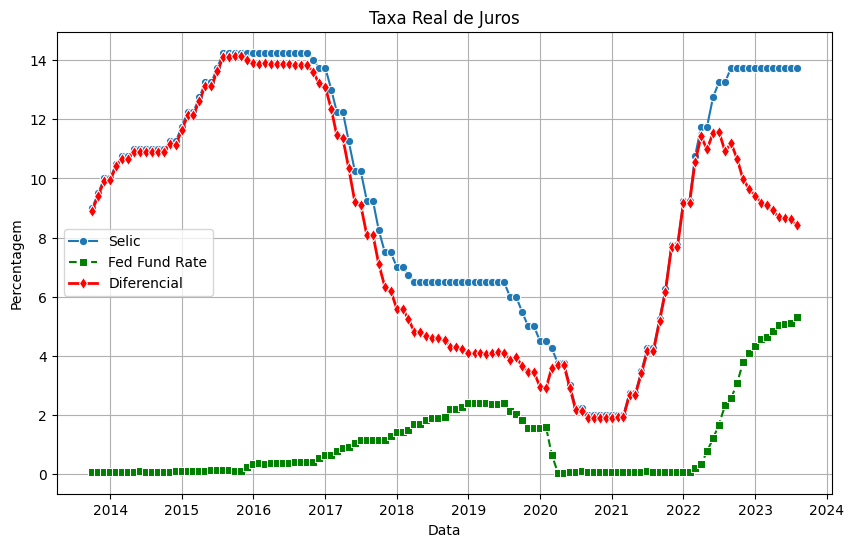

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'juntos' is your DataFrame
plt.figure(figsize=(10, 6))

# Gráfico de linha para 'Taxa SELIC'
sns.lineplot(x='DateTime', y='Meta para a taxa Selic', data=juntos, label='Selic', marker='o', linestyle='-')

# Gráfico de linha para 'Taxa do Fed Fund'
sns.lineplot(x='DateTime', y='FEDFUNDS', data=juntos, label='Fed Fund Rate', marker='s', linestyle='--', color='green')

# Gráfico de linhas para 'Diferencial de Juros'
sns.lineplot(x='DateTime', y='Diferencial', data=juntos, label='Diferencial', marker='d', linestyle='-', color='red', linewidth=2)

# Adicione rótulos e título
plt.xlabel('Data')
plt.ylabel('Percentagem')
plt.title('Taxa Real de Juros')

#Mostrar a legenda
plt.legend()

# Mostre o gráfico
plt.grid(True)
plt.show()


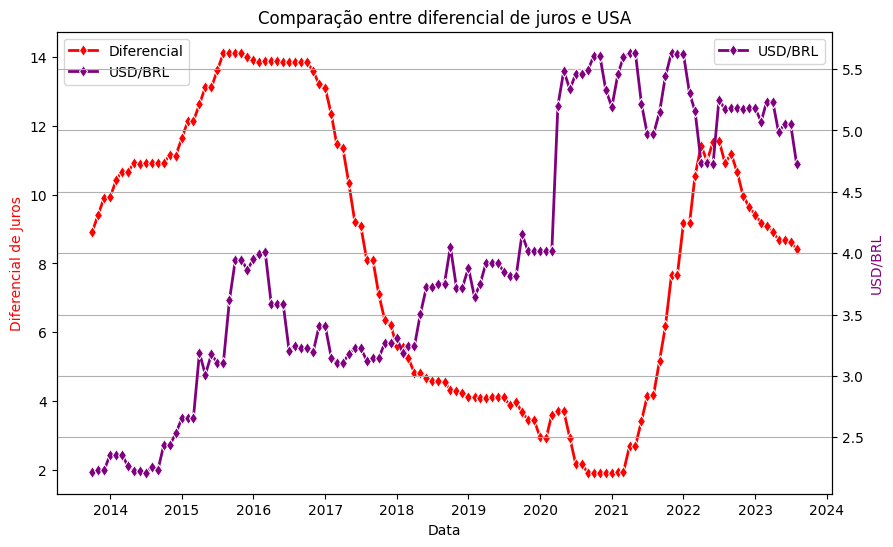

In [38]:


# Crie um lineplot Seaborn para o primeiro conjunto de dados, que é a coluna 'Diferencial' do conjunto de dados 'juntos', em que o eixo x é a data e o eixo y o valor do diferencial de juros
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='DateTime', y='Diferencial', data=juntos, label='Diferencial', marker='d', linestyle='-', color='red', linewidth=2)

#Crie um eixo y secundário para o segundo conjunto de dados
ax2 = ax.twinx()

# Plote o segundo conjunto de dados no eixo y secundário, que é o valor do USD/BRL que seria a coluna 'Fechar' do conjunto de dados 'juntos'
sns.lineplot(x='DateTime', y='Close', data=juntos, label='USD/BRL', marker='d', linestyle='-', color='purple', linewidth=2)

# Defina a cor do rótulo do primeiro eixo y para corresponder à cor da linha (vermelho)
ax.set_ylabel('Diferencial de Juros', color='red')

# Defina a cor do rótulo do segundo eixo y para corresponder à cor da linha (roxo)
ax2.set_ylabel('USD/BRL', color='purple')

#Adicione rótulos e título
ax.set_xlabel('Data')
plt.title('Comparação entre diferencial de juros e USA')

# Adicionar legendas
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc='upper left')

# Mostrar o gráfico
plt.grid(True)
plt.show()
